# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [1]:
import math
import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Задание:

Реализовать алгоритм кластеризации k-means

In [4]:
class KMeans:
    def __init__(self, n_clusters=2, metric='manhattan', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter
        self.centers = []

    def distance(self,vector1, vector2):
        '''
        Определяем функцию расстояния
        '''
        vector1 = np.array(vector1)
        vector2 = np.array(vector2)
        if (self.metric=='euclidean'):
            return np.linalg.norm(vector2-vector1)
        elif (self.metric=='manhattan'):
            dist = 0
            for i in xrange(0,len(vector1)):
                dist += math.fabs(vector1[i]-vector2[i])
            return dist
        elif (self.metric=='cheb'):
            dist = 0
            for i in xrange(0,len(vector1)):
                dist = max(dist,math.fabs(vector1[i]-vector2[i]))
            return dist
        else:
            print 'Error: '+self.metric+'This metric does not exist'
        
        return
    
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        labels = []
        for vec in X:
            vec = np.array(vec)
            mindist = self.distance(vec,self.centers[0])
            mincenter = 0
            for centind in xrange(1,len(self.centers)):
                cent = self.centers[centind]
                if self.distance(vec,cent)<mindist:
                    mindist = self.distance(vec,cent)
                    mincenter = centind
            labels.append(mincenter)
        return labels
    

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        datadim = len(X[0])
        self.centers = []
        random.seed(0)
        centinds = random.sample(range(0,len(X)),self.n_clusters)
        for i in xrange(0,self.n_clusters):
            self.centers.append(np.array(X[centinds[i]]))
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
            newcenters = [np.array([0.0 for j in xrange(datadim)]) for i in xrange(0,self.n_clusters)]
            clustersize = [0 for i in xrange(0,self.n_clusters)]
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            '''
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            labels = self.predict(X)
            ind = 0
            
            for el in X:
                newcenters[labels[ind]] += el
                clustersize[labels[ind]] += 1
                ind += 1
            
            
            '''
            Шаг 2.3 - Уточняеням положения центров кластеров
            '''
            for i in xrange(0,self.n_clusters):
                newcenters[i] = newcenters[i] / clustersize[i]
            
            self.centers = newcenters
            
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

In [5]:
f = open('../algorithms_compare/dataset1.csv')
data = []
x = []
y = []
for line in f:
    arr = line.strip().split('\t')
    data.append([float(arr[0]),float(arr[1])])
    x.append(float(arr[0]))
    y.append(float(arr[1]))
f.close()

In [6]:
kmeans = KMeans(n_clusters=3).fit(data)
labels = kmeans.predict(data)

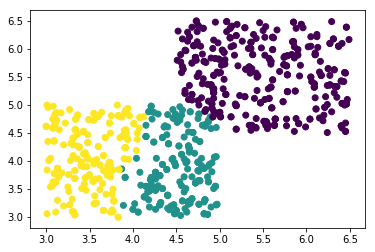

In [7]:
plt.scatter(x,y,c=labels)
plt.show()

In [8]:
f = open('../algorithms_compare/dataset2.csv')
data = []
x = []
y = []
for line in f:
    arr = line.strip().split('\t')
    data.append([float(arr[0]),float(arr[1])])
    x.append(float(arr[0]))
    y.append(float(arr[1]))
f.close()

In [9]:
kmeans = KMeans(n_clusters=3).fit(data)
labels = kmeans.predict(data)

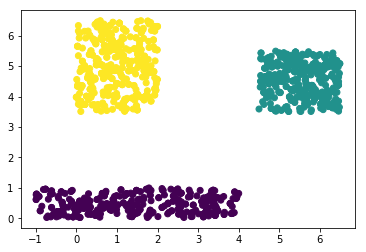

In [10]:
plt.scatter(x,y,c=labels)
plt.show()

In [11]:
f = open('../algorithms_compare/dataset3.csv')
data = []
x = []
y = []
for line in f:
    arr = line.strip().split('\t')
    data.append([float(arr[0]),float(arr[1])])
    x.append(float(arr[0]))
    y.append(float(arr[1]))
f.close()

In [12]:
kmeans = KMeans(n_clusters=3).fit(data)
labels = kmeans.predict(data)

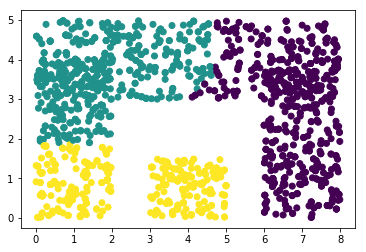

In [13]:
plt.scatter(x,y,c=labels)
plt.show()